In [1]:
# -*- coding: utf-8 -*-
# %matplotlib inline

from main import main
main()

IOError: [Errno 2] No such file or directory: '/Users/davidfoster/GoogleDrive/AGI/app/logs/logger_mcts.log'

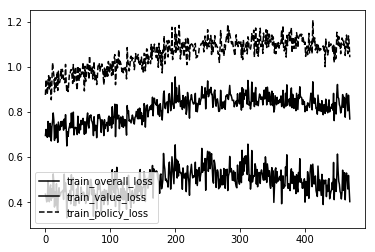




TOURNEY...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  {'drawn': 0, 'current_player': 11, 'best_player': 9}
{'nsp': 1, 'drawn': 0, 'sp': 19}
{'current_player': [1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1], 'best_player': [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1]}



ITERATION NUMBER 48
BEST PLAYER VERSION 50
SELF PLAYING 75 EPISODES...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47 

KeyboardInterrupt: 

In [2]:
INITIAL_MODEL_VERSION = 31 # None
INITIAL_MEMORY_VERSION =  '_raw_newActions31' # None # 

# dumped_memory = False



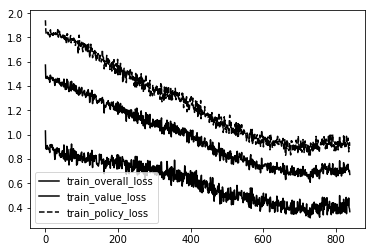




TOURNEY...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  {'drawn': 19, 'current_player': 0, 'best_player': 1}
{'nsp': 1, 'drawn': 19, 'sp': 0}
{'current_player': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], 'best_player': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]}



ITERATION NUMBER 85
BEST PLAYER VERSION 31
SELF PLAYING 75 EPISODES...
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53 

KeyboardInterrupt: 

In [6]:
while 1:

    iteration += 1
    reload(lg)
    reload(config)
    
    print('ITERATION NUMBER ' + str(iteration))
    
    lg.logger_main.info('BEST PLAYER VERSION: %d', best_player_version)
    print('BEST PLAYER VERSION ' + str(best_player_version))

    ######## SELF PLAY ########
    print('SELF PLAYING ' + str(config.EPISODES) + ' EPISODES...')
    _, memory, _, _ = playMatches(best_player, best_player, config.EPISODES, lg.logger_main, turns_until_tau0 = config.TURNS_UNTIL_TAU0, memory = memory)
 #   _, memory, _, _ = playMatches(user_player, best_player, config.EPISODES, lg.logger_main, turns_until_tau0 = config.TURNS_UNTIL_TAU0, memory = memory)
    print('\n')
    
    memory.clear_stmemory()
    

    if len(memory.ltmemory) >= config.MEMORY_SIZE:
        
#         if dumped_memory == False:
#             pickle.dump( memory, open( "./memory/memory_raw_newActions.p", "wb" ) )
#             dumped_memory = True

        ######## RETRAINING ########
        print('RETRAINING...')
        current_player.replay(memory.ltmemory)
        #printLosses(best_player, current_player, memory)
        #printLosses(best_player, best_player, memory)

        print('')

        lg.logger_memory.info('====================')
        lg.logger_memory.info('NEW MEMORIES')
        lg.logger_memory.info('====================')
        
        memory_samp = random.sample(memory.ltmemory, 1000)
        
        for s in memory_samp:
            current_value, current_probs, _ = current_player.get_preds(s['state'])
            best_value, best_probs, _ = best_player.get_preds(s['state'])

            lg.logger_memory.info('MCTS VALUE FOR %s: %f', s['playerTurn'], s['value'])
            lg.logger_memory.info('CUR PRED VALUE FOR %s: %f', s['playerTurn'], current_value)
            lg.logger_memory.info('BES PRED VALUE FOR %s: %f', s['playerTurn'], best_value)
            lg.logger_memory.info('THE MCTS ACTION VALUES: %s', ['%.2f' % elem for elem in s['AV']]  )
            lg.logger_memory.info('CUR PRED ACTION VALUES: %s', ['%.2f' % elem for elem in  current_probs])
            lg.logger_memory.info('BES PRED ACTION VALUES: %s', ['%.2f' % elem for elem in  best_probs])
            lg.logger_memory.info('ID: %s', s['state'].convertStateToId())
            lg.logger_memory.info('INPUT TO MODEL: %s', current_player.model.convertToModelInput(s['state']))

            s['state'].render(lg.logger_memory)
            
        




        ######## TOURNEY ########
        print('TOURNEY...')
        scores, _, points, sp_scores = playMatches(best_player, current_player, config.EVAL_EPISODES, lg.logger_tourney, turns_until_tau0 = 0, memory = None)
        print(scores)
        print(sp_scores)
        print(points)

        print('\n\n')

        if scores['current_player'] > scores['best_player'] * config.SCORING_THRESHOLD:
            best_player_version = best_player_version + 1
            best_NN.model.set_weights(current_NN.model.get_weights())
            best_NNs.append(best_NN)
            best_NN.write(env.name, best_player_version)


#     ### FOR NON TOURNEY ASSESSED TRAINING
#         best_player_version = best_player_version + 1
#         best_NN.model.set_weights(current_NN.model.get_weights())
#         best_NNs.append(best_NN)
#         best_NN.write(env.name, best_player_version)

    else:
        print('MEMORY SIZE: ' + str(len(memory.ltmemory)))


In [5]:
len(memory.ltmemory)

65604

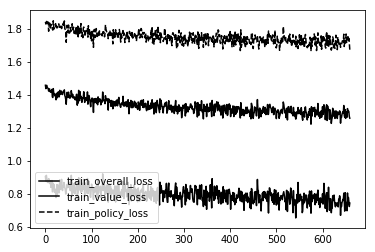

KeyboardInterrupt: 

In [8]:
while 1:
    current_player.replay(memory.ltmemory)

In [3]:
for m_idx, m in enumerate(memory.ltmemory):
    gs = m['state']
    AV = m['AV']
    input_mat = current_player.model.convertToModelInput(gs)
    
    #best_value, best_probs, _ = current_player.get_preds(gs)
    #if any(i > 0.7 and i < 1 and np.sum(input_mat) < 20 for i in best_probs):
    if gs.checkForThreat() == 1:
        print(m_idx)
        print(np.max(AV))
        print (AV)

 0
0.7929292929292929
[0.         0.         0.         0.         0.         0.
 0.         0.         0.79292929 0.05555556 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03535354 0.         0.
 0.         0.03535354 0.         0.03535354 0.         0.
 0.         0.         0.         0.04545455 0.         0.
 0.         0.         0.         0.         0.         0.        ]
1
0.7929292929292929
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05555556
 0.79292929 0.         0.         0.         0.         0.
 0.         0.         0.         0.03535354 0.         0.03535354
 0.         0.         0.         0.03535354 0.         0.04545455
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
4
0.2040133779264214
[0.         0.13712375 0.         0.         0.         0.
 0.      

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.52941176 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.47058824 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
352
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
353
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
356
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
357
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
360
1.0
[0. 0. 0. 0. 0. 0. 1. 

765
0.9714285714285714
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02857143 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.97142857 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
784
0.6956521739130435
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05217391 0.         0.04347826
 0.         0.         0.         0.06956522 0.         0.
 0.         0.         0.         0.         0.         0.
 0.04347826 0.         0.         0.         0.         0.
 0.         0.         0.         0.69565217 0.05217391 0.04347826]
785
0.6956521739130435
[0.         0.         0.         0.         0.         0.
 0.         0.      

0.9693877551020408
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.96938776 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03061224
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
1317
0.9693877551020408
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.96938776 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03061224 0.         0.
 0.         0.         0.         0.         0.         0.        ]
1318
0.524008350730689
[0.         0.         0.         0.         0.         0.
 0.         0.47599165 

In [9]:
for m_idx, m in enumerate(memory.ltmemory):
    gs = m['state']
    AV = m['AV']
    input_mat = current_player.model.convertToModelInput(gs)
    
    #best_value, best_probs, _ = current_player.get_preds(gs)
    #if any(i > 0.7 and i < 1 and np.sum(input_mat) < 20 for i in best_probs):
    if any(i > 0.7 and i < 1 and np.sum(input_mat) < 20 for i in AV):
        gs_tmp = gs
        AV_tmp = AV
        print(m_idx)

6
7
70
71
80
81
86
87
120
121
126
127
130
131
136
137
170
171
176
177
184
185
210
211
284
285
294
295
340
341
362
363
396
397
436
437
440
441
444
445
448
449
450
451
452
453
454
455
506
507
522
523
540
541
544
545
556
557
578
579
590
591
596
597
666
667
668
669
672
673
694
695
706
707
708
709
712
713
726
727
752
753
796
797
800
801
812
813
850
851
916
917
988
989
1012
1013
1022
1023
1082
1083
1090
1091
1100
1101
1112
1113
1130
1131
1206
1207
1216
1217
1252
1253
1258
1259
1286
1287
1288
1289
1290
1291
1296
1297
1342
1343
1358
1359
1434
1435
1436
1437
1488
1489
1496
1497
1566
1567
1618
1619
1686
1687
1688
1689
1714
1715
1726
1727
1762
1763
1918
1919
1932
1933
1998
1999
2008
2009
2014
2015
2080
2081
2100
2101
2148
2149
2176
2177
2182
2183
2190
2191
2226
2227
2296
2297
2380
2381
2388
2389
2392
2393
2436
2437
2438
2439
2456
2457
2476
2477
2532
2533
2590
2591
2674
2675
2682
2683
2744
2745
2834
2835
2840
2841
2844
2845
2878
2879
2960
2961
2962
2963
2966
2967
2970
2971
3024
3025
3070
3071
3082

27418
27419
27432
27433
27448
27449
27472
27473
27476
27477
27480
27481
27486
27487
27534
27535
27540
27541


KeyboardInterrupt: 

In [12]:
#idx = 573
#idx = 1341
idx = 171
memory.ltmemory[idx]['state'].render(lg.logger_memory)
print('PLAYER TURN: ' + str(memory.ltmemory[idx]['playerTurn']))
print('VALUE: ' + str(memory.ltmemory[idx]['value']))
print('POLICY: ' + str(memory.ltmemory[idx]['AV']))

PLAYER TURN: -1
VALUE: -1
POLICY: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06578947 0.
 0.78289474 0.         0.         0.01973684 0.         0.
 0.         0.         0.         0.05921053 0.         0.
 0.         0.01973684 0.         0.         0.         0.
 0.02631579 0.         0.         0.         0.02631579 0.        ]


In [18]:


gs = GameState(np.array([
     0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 1,-1, 0, 0,
     0, 0, 0, 1,-1,-1, 0,
     0, 0, 1, 1,-1,-1, 1
]), 1)

#current_NN = CNN(config.REG_CONST, config.DROPOUT, config.LEARNING_RATE, (2,) + env.grid_shape,   env.action_size + 1, config.HIDDEN_CNN_LAYERS)

#current_player = Agent('current_player', env.state_size, env.action_size, config.MCTS_SIMS, config.CPUCT, current_NN)

# print(current_player.model.convertToModelInput(gs))
# print(current_player.get_preds(gs))

# print(best_player.model.convertToModelInput(gs))
# print(best_player.get_preds(gs))
gs = memory.ltmemory[idx]['state']
best_value, best_probs, _ = current_player.get_preds(gs)
print(current_player.model.convertToModelInput(gs)) #current_player
print(best_value)
print(best_probs)

print(memory.ltmemory[idx])

gs.render(lg.logger_memory)



#current_player.replay(config.BATCH_SIZE * 2, memory.ltmemory)

[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [1 0 0 0 0 0 1]
  [0 0 1 0 0 0 1]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0]
  [0 0 1 0 1 0 0]
  [1 0 0 1 1 0 0]]]
[-0.30147693]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03493203 0.
 0.8203545  0.         0.         0.02828824 0.         0.
 0.         0.         0.         0.03300422 0.         0.
 0.         0.02917367 0.         0.         0.         0.
 0.02183691 0.         0.         0.         0.03241031 0.        ]
{'playerTurn': -1, 'value': -1, 'state': <game.GameState instance at 0x1236dfe18>, 'board': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0, -1,  0,  1,  0,  1,  0,
       -1,  1,  0, -1,  1,  1,  0, -1]), 'AV': array([0.        , 0.        , 0.        , 0.        , 

In [23]:
for i in memory.ltmemory:
    if i['id'] == '000000000000000000000100001000010101000010000000000000000000010000100010000000111000':
        print i

{'playerTurn': 1, 'value': -1, 'state': <game.GameState instance at 0x1191343b0>, 'board': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  1,  0,  0, -1,  0,  1,  0, -1,  0,  0,  1,  0,  1,
        0,  1, -1, -1, -1,  0,  1,  0]), 'AV': array([0.05      , 0.04285714, 0.06428571, 0.05714286, 0.69285714,
       0.03571429, 0.05714286]), 'id': '000000000000000000000100001000010101000010000000000000000000010000100010000000111000'}


In [16]:
from keras.utils import plot_model

env = Game()
state_size = len(env.gameState.binary)
action_size = len(env.actionSpace)

first_NN = Residual_CNN(config.REG_CONST, config.DROPOUT, config.LEARNING_RATE, (2,) +  env.grid_shape,   env.action_size + 1, config.HIDDEN_CNN_LAYERS)
first_player = Agent('first_player', state_size, action_size, config.MCTS_SIMS, config.CPUCT, model = first_NN)  #100
#plot_model(first_player.model.model, to_file='model.png', show_shapes = True)

In [3]:
import pickle
pickle.dump( memory, open( "./memory/memory_raw_newActions50.p", "wb" ) )

In [6]:
env = Game()
playMatchesBetweenVersions(env, -1, 24, 10, lg.logger_tourney, 0)

1 

KeyboardInterrupt: 

In [ ]:
env = Game()
state_size = len(env.gameState.binary)
action_size = len(env.actionSpace)

first_NN = Residual_CNN(config.REG_CONST, config.DROPOUT, config.LEARNING_RATE, (2,) +  env.grid_shape,   env.action_size + 1, config.HIDDEN_CNN_LAYERS)

first_player = Agent('first_player', state_size, action_size, config.MCTS_SIMS, config.CPUCT, model = first_NN)  #100
user_player = User('player1', env.state_size, env.action_size)

playMatches(user_player, first_player, 10, lg.logger_tourney, 0, memory = None)

1 Enter your chosen action: 3
Enter your chosen action: 3
Enter your chosen action: 3
Enter your chosen action: 4
Enter your chosen action: 2
Enter your chosen action: 0
Enter your chosen action: 0
Enter your chosen action: 6
Enter your chosen action: 6
Enter your chosen action: 6
 2 

In [7]:
gs = GameState(np.array([
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0
]), 1)

preds = current_player.get_preds(gs)

print(preds)

 (-0.08818689, array([ 0.04645583,  0.05069051,  0.08133888,  0.67217422,  0.04389915,
        0.05008332,  0.05535804], dtype=float32), array([0, 1, 2, 3, 4, 5, 6]))


In [9]:
len(best_player.mcts)


3886329

LAYER 0


LAYER 1


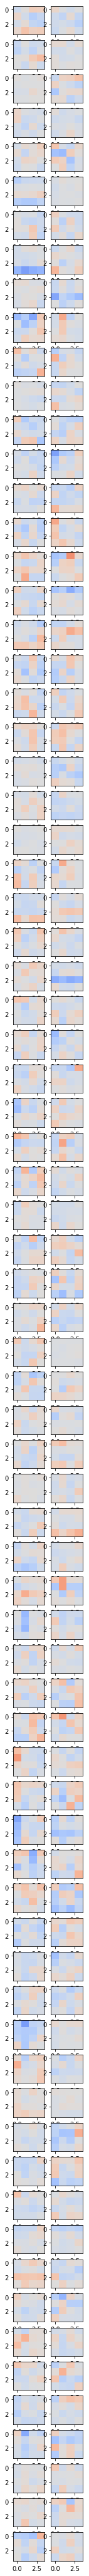

LAYER 2


LAYER 3


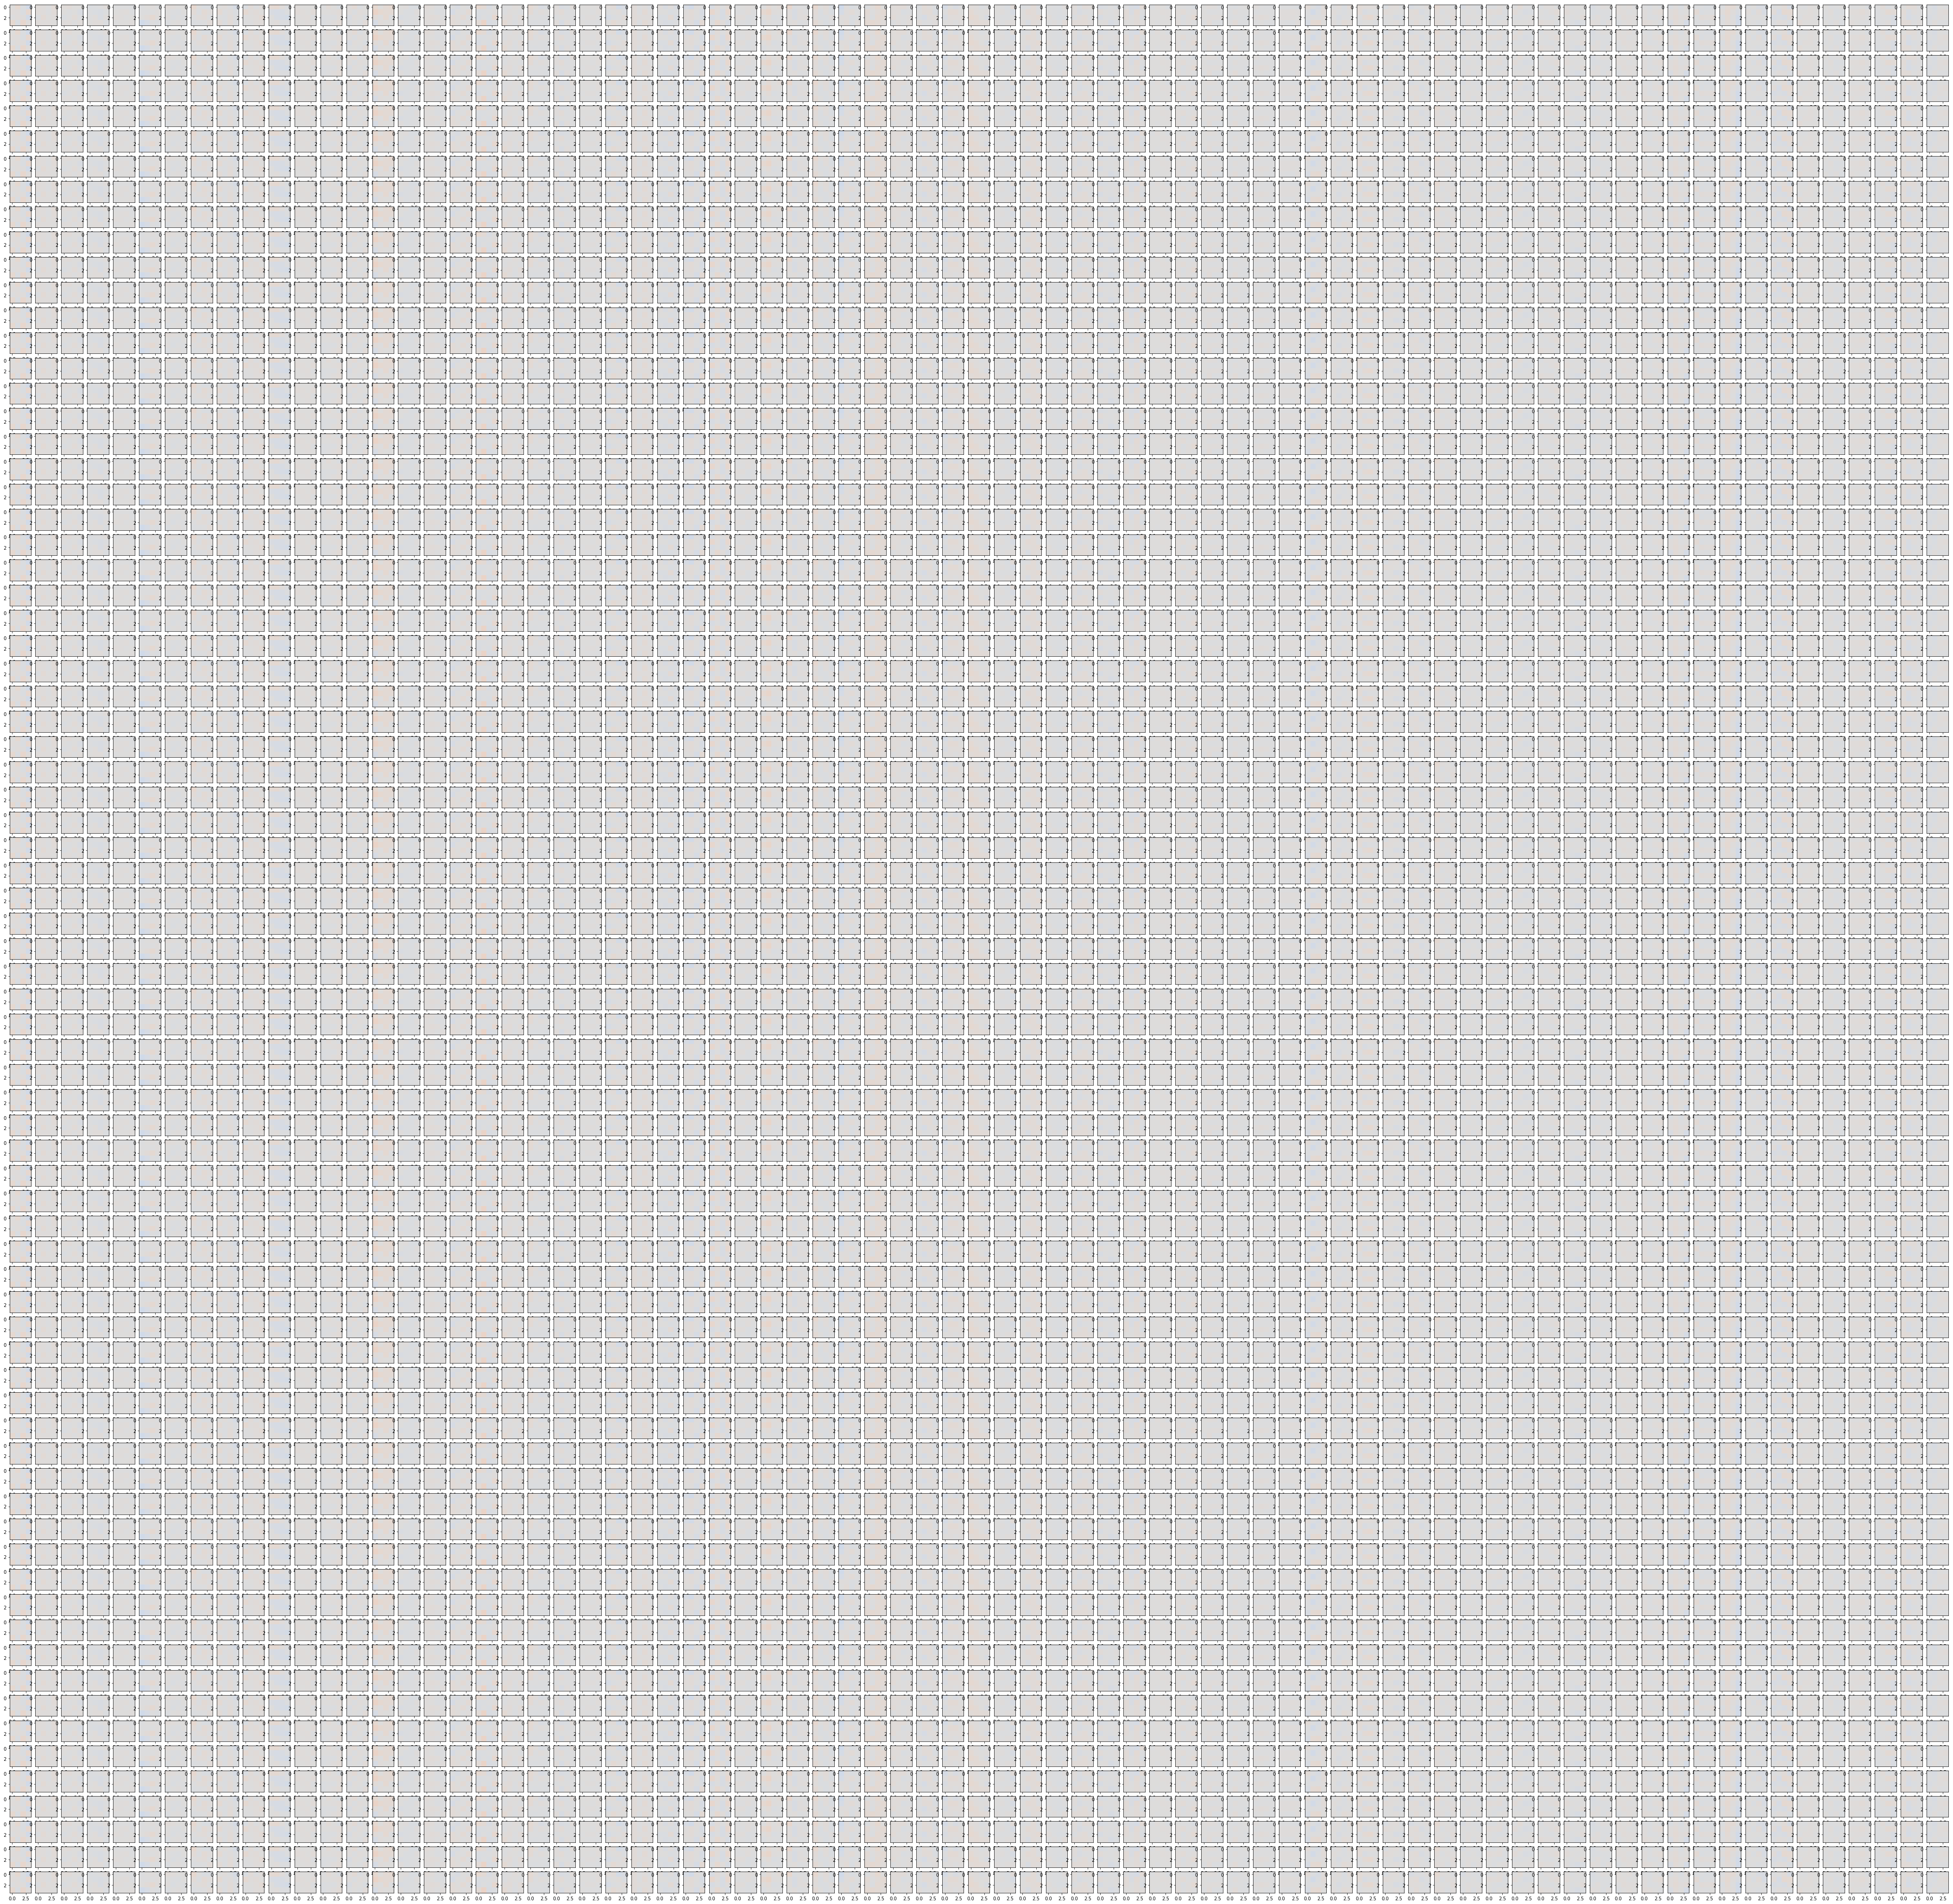

LAYER 4


LAYER 5


KeyboardInterrupt: 

In [14]:

current_player.model.viewLayers()

In [21]:
best_player_version

11